In [1]:
import pandas as pd
original_data = pd.read_csv("Building_Data.csv")
import numpy as np

In [2]:
original_data
    #This is the data set with the original buildings and variables
    #Original EBEWE data set 

,Census.Tract.GEOID,BUILDING.ID,BUILDING.ADDRESS,CARBON.DIOXIDE.EMISSIONS,COMPLIANCE.STATUS,X.DIFFERENCE.SOURCE.EUI,X.DIFFERENCE.SITE.EUI,ENERGY.STAR.SCORE,ENERGY.STAR.CERTIFICATION.ELIGIBILITY,ENERGY.STAR.CERTIFICATION.LAST.APPROVAL.DATE,...,YEAR.BUILT,AIN,LADBS.Building.Category,CityOwned,Building.Wave,Longitude,Latitude,CES.Score,CES.Score.Percentile,Disadvantaged.Community
0,6.037101e+09,472648918081,10655 TUJUNGA CANYON BLVD,NaN,0,NaN,NaN,NaN,NaN,NaN,...,NaN,025,"20,000 to 49,999",0,1,-118.29406,34.262585,22.670607,44.457056,0.0
1,6.037101e+09,474608916272,10356 COMMERCE AVE,102.2,1,-11.2,-11.2,69.0,0.0,NaN,...,1983.0,081,"20,000 to 49,999",0,2,-118.28859,34.257057,22.670607,44.457056,0.0
2,6.037101e+09,472648918081,10655 TUJUNGA CANYON BLVD,64.8,1,-43.6,-43.6,100.0,0.0,NaN,...,1982.0,025,"20,000 to 49,999",0,1,-118.29406,34.262585,22.670607,44.457056,0.0
3,6.037101e+09,470655916534,7771 W FOOTHILL BLVD,34.3,1,-9.5,-9.5,NaN,0.0,NaN,...,1995.0,901,"7,500 to 14,999",1,3,-118.30181,34.258247,22.670607,44.457056,0.0
4,6.037101e+09,473833915711,10304 TUJUNGA CANYON BLVD,NaN,0,NaN,NaN,NaN,NaN,NaN,...,NaN,057,"20,000 to 49,999",0,1,-118.29106,34.256090,22.670607,44.457056,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40826,NaN,441654895112,7063 N LAUREL CANYON BLVD,NaN,1,NaN,NaN,NaN,0.0,NaN,...,2004.0,900,"100,000+",1,2,NaN,NaN,NaN,NaN,NaN
40827,NaN,441654895112,7063 N LAUREL CANYON BLVD,67.0,1,-0.9,-0.9,NaN,0.0,NaN,...,2004.0,900,"100,000+",1,2,NaN,NaN,NaN,NaN,NaN
40828,NaN,493336854979,2630 E PEPPER AVE,128.1,1,537.5,537.5,NaN,0.0,NaN,...,1978.0,901,"7,500 to 14,999",1,5,NaN,NaN,NaN,NaN,NaN
40829,NaN,455025846874,401 S BURNSIDE AVE,174.8,1,-58.3,-58.3,100.0,0.0,NaN,...,1951.0,009,"100,000+",0,3,NaN,NaN,NaN,NaN,NaN


In [3]:
original_data.columns
    #Lookign at the variables 

Index(['Census.Tract.GEOID', 'BUILDING.ID', 'BUILDING.ADDRESS',
       'CARBON.DIOXIDE.EMISSIONS', 'COMPLIANCE.STATUS',
       'X.DIFFERENCE.SOURCE.EUI', 'X.DIFFERENCE.SITE.EUI', 'ENERGY.STAR.SCORE',
       'ENERGY.STAR.CERTIFICATION.ELIGIBILITY',
       'ENERGY.STAR.CERTIFICATION.LAST.APPROVAL.DATE',
       'ENERGY.STAR.CERTIFICATION.YEARS.CERTIFIED',
       'ENTITY.RESPONSIBLE.FOR.BENCHMARK', 'GROSS.BUILDING.FLOOR.AREA',
       'INDOOR.WATER.USE', 'INDOOR.WATER.USE.INTENSITY', 'NUMBER.OF.BUILDINGS',
       'OCCUPANCY', 'OUTDOOR.WATER.USE', 'POSTAL.CODE', 'PROGRAM.YEAR',
       'PROPERTY.TYPE', 'SITE.EUI', 'Source.EUI', 'TOTAL.WATER.USE',
       'WEATHER.NORMALIZED.SITE.EUI', 'WEATHER.NORMALIZED.SOURCE.EUI',
       'YEAR.BUILT', 'AIN', 'LADBS.Building.Category', 'CityOwned',
       'Building.Wave', 'Longitude', 'Latitude', 'CES.Score',
       'CES.Score.Percentile', 'Disadvantaged.Community'],
      dtype='object')

AC Optimization

These are the eligbility requirements for AC Optimization
1. The AC Optimization Program is available to LADWP electric service residential and commercial customers whose AC system(s) have not been optimized through an LADWP program within the last 2 years. 
2. The customer must have a central air conditioner / central heat pump system between 1 to 10 tons in size per unit. 
3. The system must be a minimum of 1 year in age and be operational at the time services are provided under the program.

### Using Nicks data, can verify if a building qualifies for AC opt through the cooling capacity tons 

In [4]:
nick_data = pd.read_csv('bld_data.csv')
nick_data

,BUILDING.ID,building.type,year.built..year.,floor_area,baseline.annual.site.energy.use.intensity..kWh.m2.,floor_area_2,predicted_cooling_capacity_tons
0,474608916272,Multi Family House,1980s,16526,48.9,273108676,0.271288
1,471068915912,Multi Family House,1980s,42728,38.2,1825681984,0.304610
2,475197914051,Multi Family House,1980s,24769,51.7,613503361,0.309552
3,474880915329,Multi Family House,1970s,21096,11.8,445041216,0.171545
4,473333914129,Multi Family House,1960s,28901,49.5,835267801,0.314196
...,...,...,...,...,...,...,...
2617,999000000227,Multi Family House,1990s,127630,45.7,16289416900,0.452219
2618,403609884896,Multi Family House,1970s,29536,44.7,872375296,0.307020
2619,475675840401,Multi Family House,1950s,41172,48.2,1695133584,0.714319
2620,467913749199,Retail,1990s,25998,37.8,675896004,0.873476


In [5]:
nick2 = pd.Series(nick_data['predicted_cooling_capacity_tons'])

In [6]:
#Need to first define which ones are eligible for AC optimization 
qualified = nick2.between(0,10)

In [7]:
#Need to find the indexes for the ones eligible
nick2[qualified]
nick2[qualified].index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    9,   10,
            ...
            2610, 2611, 2612, 2613, 2615, 2616, 2617, 2618, 2619, 2620],
           dtype='int64', length=2155)

In [8]:
#Need data set of the qualified 
qualified_buildings = nick_data[qualified]
qualified_buildings

,BUILDING.ID,building.type,year.built..year.,floor_area,baseline.annual.site.energy.use.intensity..kWh.m2.,floor_area_2,predicted_cooling_capacity_tons
0,474608916272,Multi Family House,1980s,16526,48.9,273108676,0.271288
1,471068915912,Multi Family House,1980s,42728,38.2,1825681984,0.304610
2,475197914051,Multi Family House,1980s,24769,51.7,613503361,0.309552
3,474880915329,Multi Family House,1970s,21096,11.8,445041216,0.171545
4,473333914129,Multi Family House,1960s,28901,49.5,835267801,0.314196
...,...,...,...,...,...,...,...
2616,440648884069,Multi Family House,1970s,32781,24.1,1074593961,0.233464
2617,999000000227,Multi Family House,1990s,127630,45.7,16289416900,0.452219
2618,403609884896,Multi Family House,1970s,29536,44.7,872375296,0.307020
2619,475675840401,Multi Family House,1950s,41172,48.2,1695133584,0.714319


In [9]:
qualified_buildings.to_csv('qualified_AC_ver3.CSV')
    #Data set of building ID's that qualified for AC OP with the variables from Nicks Model
    #This was one of the data sets used by Maddie in her analysis of savings 

In [10]:
qualified_actual = []
for i in nick2:
    if i <=10:
        qualified_actual.append(1)
    else:
        qualified_actual.append(0)
qualified_actual
nick_data['qualified'] = qualified_actual    
    #General for loop used for finding qualified buildings 

In [11]:
nick_data['qualified']
np.mean(nick_data['qualified'])

0.8218916857360793

([<matplotlib.patches.Wedge at 0x2240a0719d0>,
 [Text(-0.49189290682598574, -0.9838909330887659, 'Ineligible:503'),
  Text(0.49224218923544183, 0.9837162330350657, 'Eligible:87')],
 [Text(-0.2683052219050831, -0.5366677816847814, '85.24'),
  Text(0.26849573958296824, 0.5365724907463995, '14.75')])

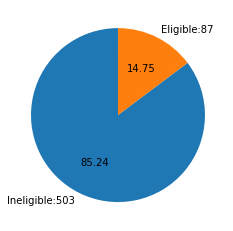

In [12]:
#This pie chart code was reused multiple times to generate the different plots 
import matplotlib.pyplot as plotter

pieLabels = 'Ineligible:503','Eligible:87'
populationShare = [.85243,.147457]
figureObject, axesObject = plotter.subplots()

axesObject.pie(populationShare,

        labels=pieLabels,

        autopct='%1.2f',

        startangle=90)

([<matplotlib.patches.Wedge at 0x2240a0f64f0>,
 [Text(-0.012015410242794332, 1.0999343752773152, 'Ineligible Multi: 7'),
  Text(0.012015488284817067, -1.0999343744248007, 'Eligible Multi: 2006')],
 [Text(-0.006553860132433272, 0.5999642046967173, '0.35'),
  Text(0.006553902700809309, -0.5999642042317094, '99.65')])

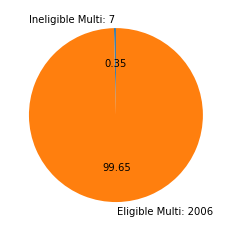

In [13]:
#Of the multi family housies, 99.6523% were eligible, 13.6882% of offices are eligible, and 92.7711% of retail are eligible
pieLabels = 'Ineligible Multi: 7','Eligible Multi: 2006'
populationShare = [.003477,.996523]
figureObject, axesObject = plotter.subplots()

axesObject.pie(populationShare,

        labels=pieLabels,

        autopct='%1.2f',

        startangle=90)
#The sum total of multifamily homes eligible is 2006
#The sum total of multifamily homes ineligible is 7

([<matplotlib.patches.Wedge at 0x2240a13a550>,
 [Text(-0.45858538669469034, -0.999849710261538, 'Ineligible Office: 454'),
  Text(0.4585853866946905, 0.999849710261538, 'Eligible Office: 72')],
 [Text(-0.2501374836516493, -0.5453725692335661, '86.31'),
  Text(0.25013748365164934, 0.5453725692335661, '13.69')])

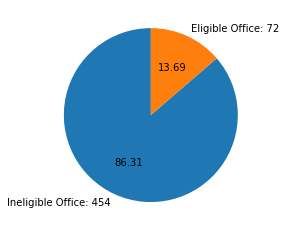

In [14]:
#This will be the pie chart for office buildings 
pieLabels = 'Ineligible Office: 454','Eligible Office: 72'
populationShare = [.863118,.136882]
figureObject, axesObject = plotter.subplots()

axesObject.pie(populationShare,

        labels=pieLabels,

        autopct='%1.2f',

        startangle=90)
#72 offices eligible for ac op
#454 office ineligible for ac op 

([<matplotlib.patches.Wedge at 0x2240a184130>,
 [Text(-0.2476709986966494, 1.0717551382683475, 'Ineligible Retail: 6'),
  Text(0.24767102378288888, -1.071755132471189, 'Eligible Retail: 77')],
 [Text(-0.1350932720163542, 0.5845937117827349, '7.23'),
  Text(0.13509328569975756, -0.5845937086206484, '92.77')])

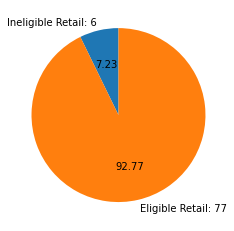

In [15]:
#This will be the pie chart for retail 
pieLabels = 'Ineligible Retail: 6','Eligible Retail: 77'
populationShare = [.072289,.927711]
figureObject, axesObject = plotter.subplots()

axesObject.pie(populationShare,

        labels=pieLabels,

        autopct='%1.2f',

        startangle=90)
#77 eligible in retail 
#6 ineligible in retail 

In [16]:
#Information for making some of the pie charts
multifamily = nick_data.groupby(['building.type']).mean()
multifamily

,BUILDING.ID,floor_area,baseline.annual.site.energy.use.intensity..kWh.m2.,floor_area_2,predicted_cooling_capacity_tons,qualified
building.type,,,,,,
Multi Family House,4.477167e+11,67436.856930,38.612817,1.455734e+10,2.252969,0.996523
Office,4.423781e+11,163793.423954,57.156464,1.089200e+11,905.679056,0.136882
Retail,4.828450e+11,70883.156627,56.981928,8.566238e+09,3.371356,0.927711


In [17]:
#The following cells were how I found the specific amount of buildings in a given category
fill = []
for i in nick_data['building.type']:
    if i == 'Retail':
        fill.append(1)
    else:
        fill.append(0)
fill2 = []
for i in nick_data['building.type']:
    fill2.append(1)
sum(fill2)
sum(fill)

83

In [18]:
fill = []
for i in nick_data['building.type']:
    if i == 'Office':
        fill.append(1)
    else:
        fill.append(0)
fill2 = []
for i in nick_data['building.type']:
    fill2.append(1)
sum(fill2)
sum(fill)

526

In [19]:
fill = []
for i in nick_data['building.type']:
    if i == 'Multi Family House':
        fill.append(1)
    else:
        fill.append(0)
fill2 = []
for i in nick_data['building.type']:
    fill2.append(1)
sum(fill2)
sum(fill)

2013

In [20]:
#Complete plots on the slide deck 

CDI

Depending on the different qualifications, each building may or may not qualify. This is for determining if the building qualifies for CDI 
1. LADWP business electric customers, in good standing, whose average monthly electrical use is 250 kW or less. 
2. Have an active non-residential SoCalGas account in good standing. 
3. SoCalGas nonresidential customers must have an annual natural gas consumption less than 50,000 therms per year at the service facility. 3a. There is no 50,000 therms per year requirement for SoCalGas customers categorized as public and private schools, K-12 schools, private colleges, universities, educational services, or trade schools. 
4. Fill out and sign the CDI Authorization Form.

Sustento Nick has said for CDI the most important is just the 250kW threshold

In [21]:
#Will be looking instead at the original data set and looking at whether or not it has a site energy site use intensity less than 250kw
original_data['SITE.EUI']
    #This is in units of kbtu/ft^2
original_data['GROSS.BUILDING.FLOOR.AREA']
    #This is in ft^2 
#We need units of kw purely and see if each is less than 250kW

0             NaN
1         16526.0
2         24186.0
3         10500.0
4             NaN
           ...   
40826     15793.0
40827     15793.0
40828      8500.0
40829    192306.0
40830         NaN
Name: GROSS.BUILDING.FLOOR.AREA, Length: 40831, dtype: float64

In [22]:
#Need an array of the kw for each building 
#This is done by taking the site eui times the gross.building.floor.area and then times .00029
original_data['kwAmount'] = (original_data['SITE.EUI']) * (original_data['GROSS.BUILDING.FLOOR.AREA']) * (.00029)
    #Later realized it would be misleading to use the original data as our analysis is on the simulated basic data 

In [23]:
nates_data = pd.read_csv('natural_gas_imputation.CSV')
    #Nates data from his model on natural gas prediction, this was the data set sent to Nick to complete the final deliverable data set 

In [24]:
#For obtaining the variable of interest for cdi eligibility 
nates_data['kwAmount'] = (nates_data['site_eui'])*(nates_data['floor_area'])*.00029

In [25]:
nates_eligible = []
for i in nates_data['kwAmount']:
    if i <= 250:
        nates_eligible.append(1)
    else:
        nates_eligible.append(0)
#For loop for identifyign those buidlings that qualify for CDI from Nates data set 

In [26]:
nates_data['eligible'] = nates_eligible

In [27]:
b = (nates_data['eligible']==1)

In [28]:
b.index

RangeIndex(start=0, stop=2537, step=1)

In [29]:
nates_data[b]

,Unnamed: 0,index,BUILDING.ID,floor_area,annual_water,site_eui,type,post1980,Natural Gas,kwAmount,eligible
0,0,1,4.746090e+11,16526.0,130.455041,48.9,Multifamily Housing,1,-512.661085,234.355206,1
3,3,34,4.748810e+11,21096.0,47.871634,11.8,Multifamily Housing,0,716.006713,72.190512,1
7,7,65,4.767420e+11,27000.0,59.596296,11.6,Multifamily Housing,1,-165.702000,90.828000,1
9,9,103,4.774660e+11,35000.0,3.294286,20.2,Office,0,1114.466801,205.030000,1
14,14,169,4.654680e+11,24234.0,63.233474,5.9,Multifamily Housing,1,-258.817310,41.464374,1
...,...,...,...,...,...,...,...,...,...,...,...
2503,2503,39513,4.022580e+11,105000.0,67.708571,1.1,Multifamily Housing,0,3462.777288,33.495000,1
2514,2514,39720,3.807170e+11,37012.0,74.438020,22.7,Office,0,1178.359742,243.649996,1
2517,2517,39777,4.794840e+11,21252.0,117.527762,21.9,Multifamily Housing,0,725.574555,134.971452,1
2519,2519,39843,4.403760e+11,42864.0,47.725364,3.5,Multifamily Housing,0,1443.865751,43.506960,1


In [30]:
nates_data['floor_area_2'] = nates_data['floor_area']**2

In [31]:
nates_data[b].to_csv('CDI_eligible.CSV')
    #This was the data set that was sent to Maddie for her analysis of 
    #This is the set of buildings that were CDI eligible 

In [32]:
nates_data[b]

,Unnamed: 0,index,BUILDING.ID,floor_area,annual_water,site_eui,type,post1980,Natural Gas,kwAmount,eligible,floor_area_2
0,0,1,4.746090e+11,16526.0,130.455041,48.9,Multifamily Housing,1,-512.661085,234.355206,1,2.731087e+08
3,3,34,4.748810e+11,21096.0,47.871634,11.8,Multifamily Housing,0,716.006713,72.190512,1,4.450412e+08
7,7,65,4.767420e+11,27000.0,59.596296,11.6,Multifamily Housing,1,-165.702000,90.828000,1,7.290000e+08
9,9,103,4.774660e+11,35000.0,3.294286,20.2,Office,0,1114.466801,205.030000,1,1.225000e+09
14,14,169,4.654680e+11,24234.0,63.233474,5.9,Multifamily Housing,1,-258.817310,41.464374,1,5.872868e+08
...,...,...,...,...,...,...,...,...,...,...,...,...
2503,2503,39513,4.022580e+11,105000.0,67.708571,1.1,Multifamily Housing,0,3462.777288,33.495000,1,1.102500e+10
2514,2514,39720,3.807170e+11,37012.0,74.438020,22.7,Office,0,1178.359742,243.649996,1,1.369888e+09
2517,2517,39777,4.794840e+11,21252.0,117.527762,21.9,Multifamily Housing,0,725.574555,134.971452,1,4.516475e+08
2519,2519,39843,4.403760e+11,42864.0,47.725364,3.5,Multifamily Housing,0,1443.865751,43.506960,1,1.837322e+09


In [33]:
g = (nates_data[b]['type'] != 'Multifamily Housing')

In [34]:
g.index

Int64Index([   0,    3,    7,    9,   14,   18,   21,   26,   30,   33,
            ...
            2440, 2447, 2466, 2475, 2495, 2503, 2514, 2517, 2519, 2532],
           dtype='int64', length=496)

In [35]:
nates_data[b][g]
    #Property types besides multi family homes that qualified for CDI 

,Unnamed: 0,index,BUILDING.ID,floor_area,annual_water,site_eui,type,post1980,Natural Gas,kwAmount,eligible,floor_area_2
9,9,103,4.774660e+11,35000.0,3.294286,20.2,Office,0,1114.466801,205.030000,1,1.225000e+09
53,53,1443,4.208850e+11,22358.0,20.578764,35.6,Office,1,711.126524,230.823992,1,4.998802e+08
65,65,1632,4.047380e+11,38756.0,6.646713,14.4,Office,0,1234.071484,161.845056,1,1.502028e+09
92,92,2065,3.822820e+11,41160.0,0.012148,11.2,Office,1,1310.540739,133.687680,1,1.694146e+09
93,93,2066,3.822710e+11,98370.0,2.220189,1.8,Office,1,3113.019083,51.349140,1,9.676657e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
2434,2434,38570,5.082400e+11,28812.0,1.180064,9.6,Office,1,917.836964,80.212608,1,8.301313e+08
2440,2440,38626,4.426870e+11,41172.0,2.336539,20.5,Office,0,1310.603442,244.767540,1,1.695134e+09
2447,2447,38702,4.428720e+11,7500.0,19.840000,33.4,Office,1,235.978270,72.645000,1,5.625000e+07
2466,2466,38994,5.648770e+11,25605.0,3.792228,10.4,Office,0,815.583069,77.224680,1,6.556160e+08


In [36]:
bens_data_number_units = pd.read_csv("hvac_unit_data2.csv")
bens_data_type_units = pd.read_csv('hvac_type_data.csv')

In [37]:
hvac_AC_qualified = pd.merge(qualified_buildings, bens_data_number_units, on='BUILDING.ID')
hvac_AC_qualified = pd.merge(hvac_AC_qualified, bens_data_type_units, on='BUILDING.ID')

In [38]:
hvac_AC_qualified
    #So you can use this one for making visuals for the hvac unit and types for ac qualified 
    #This one is with the variables from Nicks data set and bens variables 
    #This was sent to Nick to be used to create the final deliverable data set 

,BUILDING.ID,building.type,year.built..year.,floor_area,baseline.annual.site.energy.use.intensity..kWh.m2.,floor_area_2,predicted_cooling_capacity_tons,predicted_HVAC_units,predicted_HVAC_type
0,474608916272,Multi Family House,1980s,16526,48.9,273108676,0.271288,3,4
1,471068915912,Multi Family House,1980s,42728,38.2,1825681984,0.304610,8,4
2,475197914051,Multi Family House,1980s,24769,51.7,613503361,0.309552,5,4
3,474880915329,Multi Family House,1970s,21096,11.8,445041216,0.171545,4,4
4,473333914129,Multi Family House,1960s,28901,49.5,835267801,0.314196,5,4
...,...,...,...,...,...,...,...,...,...
2123,440648884069,Multi Family House,1970s,32781,24.1,1074593961,0.233464,6,4
2124,999000000227,Multi Family House,1990s,127630,45.7,16289416900,0.452219,22,4
2125,403609884896,Multi Family House,1970s,29536,44.7,872375296,0.307020,5,4
2126,475675840401,Multi Family House,1950s,41172,48.2,1695133584,0.714319,7,4


In [39]:
original_data['kwAmount']
eligible_for_CDI = []
for i in original_data['kwAmount']:
    if i <= 250:
        eligible_for_CDI.append(1)
    else:
        eligible_for_CDI.append(0)
np.mean(eligible_for_CDI)
original_data['eligible_for_CDI'] = eligible_for_CDI
original_data['eligible_for_CDI']
original_data2 = original_data.drop_duplicates(subset='BUILDING.ID', keep="first")
a = (original_data2['eligible_for_CDI']==1) 
a.index
original_data2[a]
    #This has the building id of those that are eligible for cdi
    #All the buildings in the original data that were eligible for cdi 
    #This is different from the data from nates dataset, this is those from the original EBEWE that wer eligible 
    #This data set was not used in our analysis as it refers to the original EBEWE data set as opposed to the simulated data set

,Census.Tract.GEOID,BUILDING.ID,BUILDING.ADDRESS,CARBON.DIOXIDE.EMISSIONS,COMPLIANCE.STATUS,X.DIFFERENCE.SOURCE.EUI,X.DIFFERENCE.SITE.EUI,ENERGY.STAR.SCORE,ENERGY.STAR.CERTIFICATION.ELIGIBILITY,ENERGY.STAR.CERTIFICATION.LAST.APPROVAL.DATE,...,LADBS.Building.Category,CityOwned,Building.Wave,Longitude,Latitude,CES.Score,CES.Score.Percentile,Disadvantaged.Community,kwAmount,eligible_for_CDI
1,6.037101e+09,474608916272,10356 COMMERCE AVE,102.2,1,-11.2,-11.2,69.0,0.0,NaN,...,"20,000 to 49,999",0,2,-118.28859,34.257057,22.670607,44.457056,0.0,234.355206,1
3,6.037101e+09,470655916534,7771 W FOOTHILL BLVD,34.3,1,-9.5,-9.5,NaN,0.0,NaN,...,"7,500 to 14,999",1,3,-118.30181,34.258247,22.670607,44.457056,0.0,141.288000,1
34,6.037101e+09,474880915329,10230 SAMOA AVE,17.5,1,-58.0,-58.0,100.0,0.0,NaN,...,"20,000 to 49,999",0,5,-118.28733,34.254684,28.883657,57.598688,0.0,72.190512,1
65,6.037101e+09,476741913828,6842 VALMONT ST,17.2,1,-83.2,-83.2,100.0,0.0,NaN,...,"20,000 to 49,999",0,5,-118.28107,34.251816,27.119941,54.117795,0.0,90.828000,1
103,6.037101e+09,477465912352,6708 FOOTHILL BLVD,49.8,1,-63.4,-63.4,97.0,0.0,NaN,...,"20,000 to 49,999",0,2,-118.27791,34.247066,26.620960,53.159289,0.0,205.030000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40278,NaN,440648884069,12245 CHANDLER BLVD,52.4,1,-37.3,-37.3,98.0,1.0,NaN,...,"20,000 to 49,999",0,5,NaN,NaN,NaN,NaN,NaN,229.106409,1
40296,NaN,473779734570,2175 W JOHN S GIBSON BLVD,40.2,1,NaN,NaN,NaN,0.0,NaN,...,"50,000 to 99,999",1,1,NaN,NaN,NaN,NaN,NaN,174.563151,1
40447,NaN,389584925172,11641 N CORBIN AVE,38.5,1,-31.2,-31.2,NaN,0.0,NaN,...,"7,500 to 14,999",1,2,NaN,NaN,NaN,NaN,NaN,174.293625,1
40722,NaN,437157883791,12800 CHANDLER BLVD,50.5,1,71.6,71.6,17.0,0.0,NaN,...,"20,000 to 49,999",0,1,NaN,NaN,NaN,NaN,NaN,220.655664,1


In [40]:
#This will be for merging cdi eligible with bens to get the predicted hvac type and then unit number 
data4 = pd.merge(original_data2[a], bens_data_type_units, on='BUILDING.ID')
data4
    #This data set contains the buildings from the original data set that matched with bens model that were elgible for cdi
    #Our presentation and models focused on those from the basic simulation data, so these were not used 

,Census.Tract.GEOID,BUILDING.ID,BUILDING.ADDRESS,CARBON.DIOXIDE.EMISSIONS,COMPLIANCE.STATUS,X.DIFFERENCE.SOURCE.EUI,X.DIFFERENCE.SITE.EUI,ENERGY.STAR.SCORE,ENERGY.STAR.CERTIFICATION.ELIGIBILITY,ENERGY.STAR.CERTIFICATION.LAST.APPROVAL.DATE,...,CityOwned,Building.Wave,Longitude,Latitude,CES.Score,CES.Score.Percentile,Disadvantaged.Community,kwAmount,eligible_for_CDI,predicted_HVAC_type
0,6.037101e+09,474608916272,10356 COMMERCE AVE,102.2,1,-11.2,-11.2,69.0,0.0,NaN,...,0,2,-118.288590,34.257057,22.670607,44.457056,0.0,234.355206,1,4
1,6.037101e+09,474880915329,10230 SAMOA AVE,17.5,1,-58.0,-58.0,100.0,0.0,NaN,...,0,5,-118.287330,34.254684,28.883657,57.598688,0.0,72.190512,1,4
2,6.037101e+09,476741913828,6842 VALMONT ST,17.2,1,-83.2,-83.2,100.0,0.0,NaN,...,0,5,-118.281070,34.251816,27.119941,54.117795,0.0,90.828000,1,4
3,6.037101e+09,477465912352,6708 FOOTHILL BLVD,49.8,1,-63.4,-63.4,97.0,0.0,NaN,...,0,2,-118.277910,34.247066,26.620960,53.159289,0.0,205.030000,1,1
4,6.037103e+09,465467917310,10523 FLORALITA AVE,8.9,1,-90.1,-90.1,NaN,0.0,NaN,...,0,1,-118.317924,34.259937,32.969825,64.825325,0.0,41.464374,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,NaN,402257918661,18110 CHATSWORTH ST,8.8,1,-97.0,-97.0,100.0,0.0,NaN,...,0,1,NaN,NaN,NaN,NaN,NaN,33.495000,1,4
518,NaN,380716887817,5919 CANOGA AVE,56.9,1,-35.9,-35.9,NaN,0.0,NaN,...,0,4,NaN,NaN,NaN,NaN,NaN,243.649996,1,1
519,NaN,479483742620,835 BAY VIEW AVE,32.8,1,-44.2,-44.2,98.0,0.0,NaN,...,0,1,NaN,NaN,NaN,NaN,NaN,134.971452,1,4
520,NaN,440375884133,12311 CHANDLER BLVD,10.7,1,-89.0,-89.0,100.0,1.0,NaN,...,0,2,NaN,NaN,NaN,NaN,NaN,43.506960,1,4


In [41]:
fill_nate = []
for i in nates_data[b]['type']:
    if i == 'Retail Store':
        fill_nate.append(1)
    else:
        fill_nate.append(0)

In [42]:
sum(fill_nate)

17

In [43]:
tester = []
for i in nates_data[b]['type']:
    tester.append(1)

In [44]:
sum(tester)

496

In [45]:
nates_data['type']

0       Multifamily Housing
1       Multifamily Housing
2       Multifamily Housing
3       Multifamily Housing
4       Multifamily Housing
               ...         
2532    Multifamily Housing
2533    Multifamily Housing
2534    Multifamily Housing
2535           Retail Store
2536                 Office
Name: type, Length: 2537, dtype: object

([<matplotlib.patches.Wedge at 0x22408c26130>,
 [Text(-0.24767097361040988, -1.0717551440655053, 'Ineligible: 2041'),
  Text(0.24767094852417057, 1.0717551498626625, 'Eligible: 496')],
 [Text(-0.13509325833295083, -0.5845937149448209, '92.77'),
  Text(0.13509324464954756, 0.5845937181069067, '7.23')])

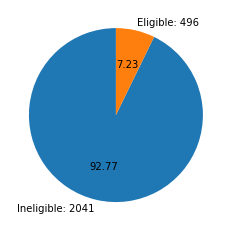

In [46]:
#Plot for eligible for cdi and not elgiible for cdi buildings in general  
pieLabels = 'Ineligible: 2041','Eligible: 496'
populationShare = [.927711,.072289]
figureObject, axesObject = plotter.subplots()

axesObject.pie(populationShare,

        labels=pieLabels,

        autopct='%1.2f',

        startangle=90)

([<matplotlib.patches.Wedge at 0x22408c7e4c0>,
 [Text(-0.6741977004263888, -0.8691705590617813, 'Ineligible Multi: 1538'),
  Text(0.6741976597375782, 0.8691705906232522, 'Eligible Multi: 409')],
 [Text(-0.36774420023257565, -0.474093032215517, '79.00'),
  Text(0.3677441780386789, 0.4740930494308647, '21.00')])

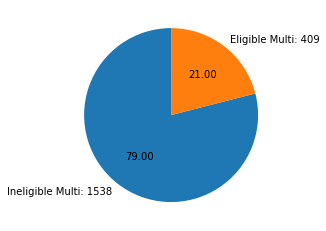

In [47]:
#Plot for eligible for cdi and not eligible for cdi for multi family homes 
pieLabels = 'Ineligible Multi: 1538','Eligible Multi: 409'
populationShare = [.79,.21]
figureObject, axesObject = plotter.subplots()

axesObject.pie(populationShare,

        labels=pieLabels,

        autopct='%1.2f',

        startangle=90)
#409 of the multi family homes are eligible for this
#1538 of multi family homes are ineligible for this 

([<matplotlib.patches.Wedge at 0x22408cc13a0>,
 [Text(-0.45801352545279433, -1.000111799001643, 'Ineligible Office: 442'),
  Text(0.4580134318155681, 1.0001118418839596, 'Eligible Office: 70')],
 [Text(-0.2498255593378878, -0.5455155267281688, '86.33'),
  Text(0.24982550826303712, 0.5455155501185234, '13.67')])

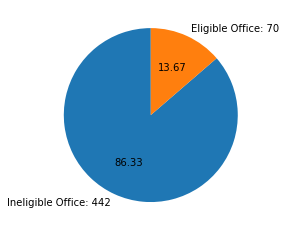

In [48]:
#Plot for eligible for cdi and not eligible for cdi for office
pieLabels = 'Ineligible Office: 442','Eligible Office: 70'
populationShare = [.8633,.1367]
figureObject, axesObject = plotter.subplots()

axesObject.pie(populationShare,

        labels=pieLabels,

        autopct='%1.2f',

        startangle=90)
#512 total office buildings
#70 that qualify 
#442 that do not qualify 

([<matplotlib.patches.Wedge at 0x22408d007f0>,
 [Text(-0.6955594362602429, -0.8521719724500058, 'Ineligible Retail: 61'),
  Text(0.6955593963671928, 0.8521720050114923, 'Eligible Retail: 17')],
 [Text(-0.37939605614195065, -0.46482107588182126, '78.21'),
  Text(0.3793960343821051, 0.4648210936426321, '21.79')])

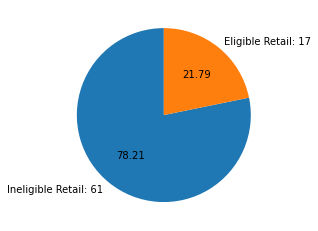

In [49]:
#Plot for eligible for cdi for retail 
pieLabels = 'Ineligible Retail: 61','Eligible Retail: 17'
populationShare = [.7821,.2179]
figureObject, axesObject = plotter.subplots()

axesObject.pie(populationShare,

        labels=pieLabels,

        autopct='%1.2f',

        startangle=90)
#78 total in the data
#17 that qualify 
#61 that do not qualify 

In [50]:
#Would need the merged data set of nates_data[b] with bens data sets 
nates_data[b]
    #This has the ones eligible for cdi 
hvac_CDI_qualified = pd.merge(nates_data[b], bens_data_type_units, on='BUILDING.ID')
hvac_CDI_qualified = pd.merge(nates_data[b], bens_data_number_units, on='BUILDING.ID')

In [51]:
hvac_CDI_qualified
    #No crossover

,Unnamed: 0,index,BUILDING.ID,floor_area,annual_water,site_eui,type,post1980,Natural Gas,kwAmount,eligible,floor_area_2,predicted_HVAC_units


In [52]:
#Would need the merged data set of qualified_buildings with bens data sets
hvac_AC_qualified
    #This contains the qualified buildings for AC and their hvac units and types 

,BUILDING.ID,building.type,year.built..year.,floor_area,baseline.annual.site.energy.use.intensity..kWh.m2.,floor_area_2,predicted_cooling_capacity_tons,predicted_HVAC_units,predicted_HVAC_type
0,474608916272,Multi Family House,1980s,16526,48.9,273108676,0.271288,3,4
1,471068915912,Multi Family House,1980s,42728,38.2,1825681984,0.304610,8,4
2,475197914051,Multi Family House,1980s,24769,51.7,613503361,0.309552,5,4
3,474880915329,Multi Family House,1970s,21096,11.8,445041216,0.171545,4,4
4,473333914129,Multi Family House,1960s,28901,49.5,835267801,0.314196,5,4
...,...,...,...,...,...,...,...,...,...
2123,440648884069,Multi Family House,1970s,32781,24.1,1074593961,0.233464,6,4
2124,999000000227,Multi Family House,1990s,127630,45.7,16289416900,0.452219,22,4
2125,403609884896,Multi Family House,1970s,29536,44.7,872375296,0.307020,5,4
2126,475675840401,Multi Family House,1950s,41172,48.2,1695133584,0.714319,7,4


In [53]:
c = hvac_AC_qualified['building.type']=='Multi Family House'
d = hvac_AC_qualified['building.type']=='Retail'
e = hvac_AC_qualified['building.type']=='Office'
c.index
d.index
e.index
hvac_AC_qualified[d]
    #For the ac qualified retail 
hvac_AC_qualified[e]
    #For the ac qualified offices 
hvac_AC_qualified.groupby(hvac_AC_qualified['predicted_HVAC_units']).count()
    #This is the groupings for the HVAC AC units in general
hvac_AC_qualified.groupby(hvac_AC_qualified['predicted_HVAC_type']).count()
hvac_AC_qualified[c]
    #For ac qualified multi family homes
hvac_AC_qualified.to_csv('Qualified_AC_Bens.CSV')
hvac_AC_qualified[c].to_csv('hvac_AC_qualified_MultiFamily.CSV')
hvac_AC_qualified[d].to_csv('hvac_AC_qualified_Retail.CSV')
hvac_AC_qualified[e].to_csv('hvac_AC_qualified_Office.CSV')

In [54]:
hvac_AC_qualified[c]
    #This tells me that 1983 are multi family that qualified for ac op and we had data for hvac type and units
    #This data is only the multi family that qualify for ac op and we have data for hvac type and units
#hvac_AC_qualified[c]['predicted_HVAC_units'].hist(column='hvac units')

test = hvac_AC_qualified[e]['predicted_HVAC_units']
test.groupby(hvac_AC_qualified[e]['predicted_HVAC_units']).count()
    #This tells me how many units are in the offices that qualify 
    

predicted_HVAC_units
1    16
2     9
3    46
Name: predicted_HVAC_units, dtype: int64

In [55]:
test2 = hvac_AC_qualified[e]['predicted_HVAC_units']

In [56]:
f = test2.groupby(hvac_AC_qualified[e]['predicted_HVAC_units']).count()

In [57]:
q75, q25 = np.percentile(f, [75 ,25])
q75 - q25

18.5

In [58]:
fill_nick = []
for i in hvac_AC_qualified['predicted_HVAC_type']:
    if i == 1:
        fill_nick.append(1)
    else:
        fill_nick.append(0)

In [59]:
sum(fill_nick)

58

In [60]:
len(hvac_AC_qualified['predicted_HVAC_type'])
    #2128 qualified total 

2128

In [61]:
#2008 of the ac qualified buildings had HVAC type of 4
#1 of the ac qualified buildings had HVAC type of 3
#61 o fthe ac qualified buildings had HVAC type of 2
#58 of the ac qualified buildings had HVAC type of 1 

([<matplotlib.patches.Wedge at 0x22408d210d0>,
 [Text(-0.09405425511822416, 1.0959716223945564, '1'),
  Text(-0.28412231428006973, 1.062673284941396, '2'),
  Text(-0.37982080341179103, 1.0323449797890345, '3'),
  Text(0.1932738366678245, -1.082887447549236, '4')],
 [Text(-0.05130232097357681, 0.5978027031243034, '2.72'),
  Text(-0.15497580778912892, 0.5796399736043978, '2.87'),
  Text(-0.2071749836791587, 0.5630972617031096, '0.04'),
  Text(0.10542209272790426, -0.5906658804814013, '94.36')])

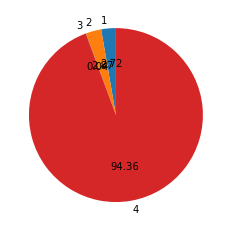

In [62]:
#Plotting the pie chart for the general distribution of HVAC type for ac qualified buildings 
pieLabels = '1','2', '3', '4'
populationShare = [.02725,.02866,.0004,.9436]
figureObject, axesObject = plotter.subplots()

axesObject.pie(populationShare,

        labels=pieLabels,

        autopct='%1.2f',

        startangle=90)